In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [22]:
df = pd.read_csv("spambase.data")
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

In [24]:
df.dropna(inplace=True)
df.describe()
display(df.describe())
print(df.info)
print(df.isnull()) # checking for nulls

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


<bound method DataFrame.info of          0  0.64  0.64.1  0.1  0.32   0.2   0.3   0.4   0.5   0.6  ...   0.41  \
0     0.21  0.28    0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.000   
1     0.06  0.00    0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.010   
2     0.00  0.00    0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
3     0.00  0.00    0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
4     0.00  0.00    0.00  0.0  1.85  0.00  0.00  1.85  0.00  0.00  ...  0.000   
...    ...   ...     ...  ...   ...   ...   ...   ...   ...   ...  ...    ...   
4595  0.31  0.00    0.62  0.0  0.00  0.31  0.00  0.00  0.00  0.00  ...  0.000   
4596  0.00  0.00    0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4597  0.30  0.00    0.30  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.102   
4598  0.96  0.00    0.00  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4599  0.00  0.00    0.65  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000

In [6]:
X = df.iloc[:, :-1]   # First 57 columns
y = df.iloc[:, -1]     # spam label: 0 or 1
print(y.value_counts())


1
0    2788
1    1812
Name: count, dtype: int64


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # data split (0.2 = 80/20)

In [8]:
# scaling to noomralize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
model = GaussianNB()
model.fit(X_train_scaled, y_train) # training the model

GaussianNB()

In [10]:
y_pred = model.predict(X_test_scaled) # predictions
display(y_pred)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [11]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel() # TN , FP , FN , TP
display(cm)
display(cm.ravel())

array([[381, 149],
       [ 23, 367]])

array([381, 149,  23, 367])

In [12]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = TN / (TN + FP)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Specificity: {specificity}")
print(f"F1 Score: {f1}")

Accuracy: 0.8130434782608695
Precision: 0.7112403100775194
Recall: 0.941025641025641
Specificity: 0.7188679245283018
F1 Score: 0.8101545253863135


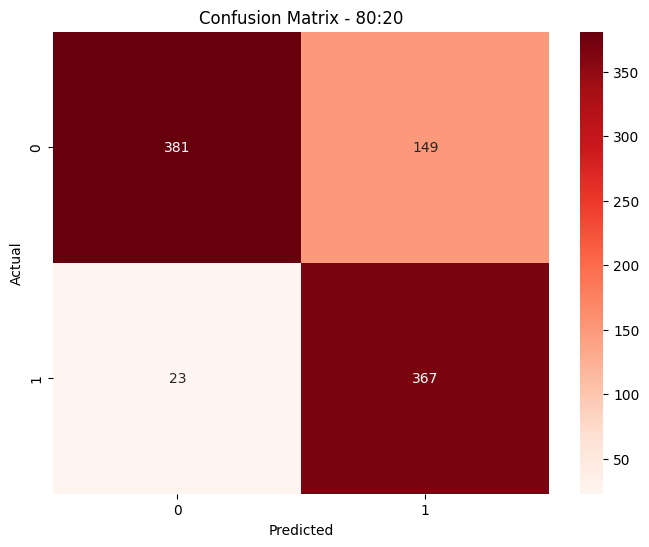

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - 80:20')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('heatmap_80_20.png', dpi=300)
plt.show()

In [14]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.4, random_state=42) # data split (O.4 =6 0/40)

In [16]:
scaler2 = StandardScaler()
X_train2_scaled = scaler2.fit_transform(X_train2)
X_test2_scaled = scaler2.transform(X_test2)

In [17]:
model2 = GaussianNB()
model2.fit(X_train2_scaled, y_train2)

GaussianNB()

In [18]:
y_pred2 = model2.predict(X_test2_scaled)

In [19]:
cm2 = confusion_matrix(y_test2, y_pred2)
TN2, FP2, FN2, TP2 = cm2.ravel()


In [20]:
accuracy2 = accuracy_score(y_test2, y_pred2)
precision2 = precision_score(y_test2, y_pred2)
recall2 = recall_score(y_test2, y_pred2)
specificity2 = TN2 / (TN2 + FP2)
f1_2 = f1_score(y_test2, y_pred2)
print(f"Accuracy: {accuracy2}")
print(f"Precision: {precision2}")
print(f"Recall: {recall2}")
print(f"Specificity: {specificity2}")
print(f"F1 Score: {f1_2}")

Accuracy: 0.803804347826087
Precision: 0.6904296875
Recall: 0.9414114513981359
Specificity: 0.7089072543617998
F1 Score: 0.7966197183098591


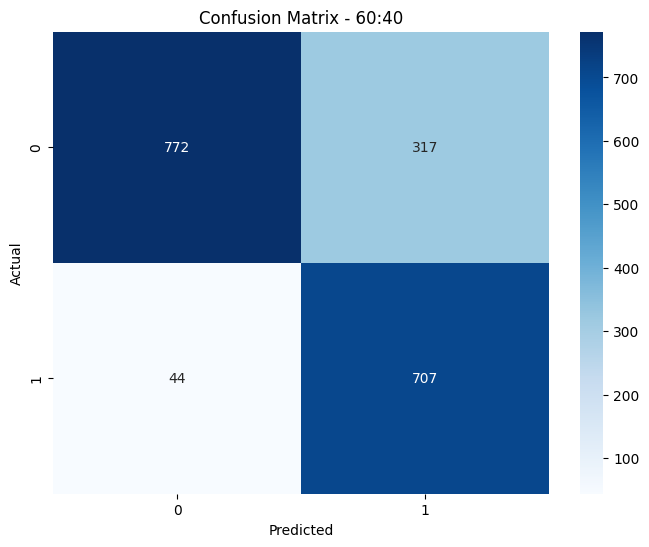

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - 60:40')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('heatmap_60_40.png', dpi=300)
plt.show()